## Regression Review
Here's a brief introduction to the regression methods used in the code earlier, along with some basic mathematical explanations:

1. **Linear Regression**:
   - **Introduction**: Linear regression is a straightforward and widely used method for modeling the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data points.
   - **Mathematics**: In simple linear regression with one feature, it aims to find the best-fit line represented as `y = mx + b`, where `y` is the target variable, `x` is the feature, `m` is the slope, and `b` is the intercept. In multiple linear regression, it extends to multiple features: `y = b0 + b1*x1 + b2*x2 + ... + bn*xn`, where `b0` is the intercept and `b1`, `b2`, ..., `bn` are coefficients.

2. **Ridge Regression**:
   - **Introduction**: Ridge regression is a regularization technique that adds L2 regularization to the linear regression model. It helps prevent overfitting by penalizing large coefficient values.
   - **Mathematics**: Ridge regression adds a penalty term to the linear regression loss function. The objective is to minimize `sum(y - (b0 + b1*x1 + b2*x2 + ... + bn*xn))^2 + alpha * sum(bi^2)`, where `alpha` controls the strength of regularization.

3. **Lasso Regression**:
   - **Introduction**: Lasso regression is another regularization technique that adds L1 regularization to the linear regression model. It encourages sparsity by setting some coefficients to exactly zero, effectively performing feature selection.
   - **Mathematics**: Lasso regression minimizes `sum(y - (b0 + b1*x1 + b2*x2 + ... + bn*xn))^2 + alpha * sum(|bi|)`, where `alpha` controls the strength of regularization.

4. **Elastic Net Regression**:
   - **Introduction**: Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization to balance feature selection and coefficient shrinkage. It is useful when dealing with datasets with a large number of features.
   - **Mathematics**: Elastic Net minimizes `sum(y - (b0 + b1*x1 + b2*x2 + ... + bn*xn))^2 + alpha * (l1_ratio * sum(|bi|) + 0.5 * (1 - l1_ratio) * sum(bi^2))`, where `alpha` controls the strength of regularization, and `l1_ratio` balances between L1 and L2 penalties.

5. **Support Vector Regression (SVR)**:
   - **Introduction**: SVR is a regression technique that uses support vector machines to find the best-fit hyperplane while considering a margin of tolerance for prediction errors.
   - **Mathematics**: SVR seeks to minimize the loss function `sum(max(0, |y - f(xi)| - epsilon))`, where `epsilon` is the margin of tolerance, and `f(xi)` is the predicted value.

These regression methods differ in their approaches to modeling the relationship between features and the target variable, and they often have different strengths and weaknesses depending on the characteristics of the data and the specific problem at hand.

## Brief Case Study

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load the diabetes dataset
diabetes = load_diabetes()

# Create a Pandas DataFrame for easy data manipulation
data = pd.DataFrame(data=np.c_[diabetes.data, diabetes.target], columns=diabetes.feature_names + ['target'])



## Data Exploration

Dataset Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-

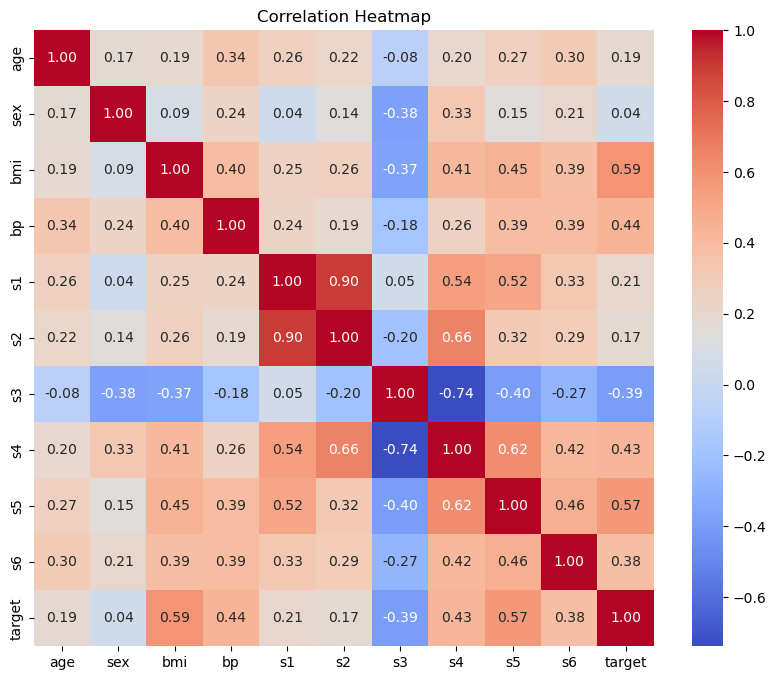

In [3]:
# Basic dataset statistics
print("Dataset Statistics:")
print(data.describe())

# Correlation matrix
corr_matrix = data.corr()

# Visualization of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


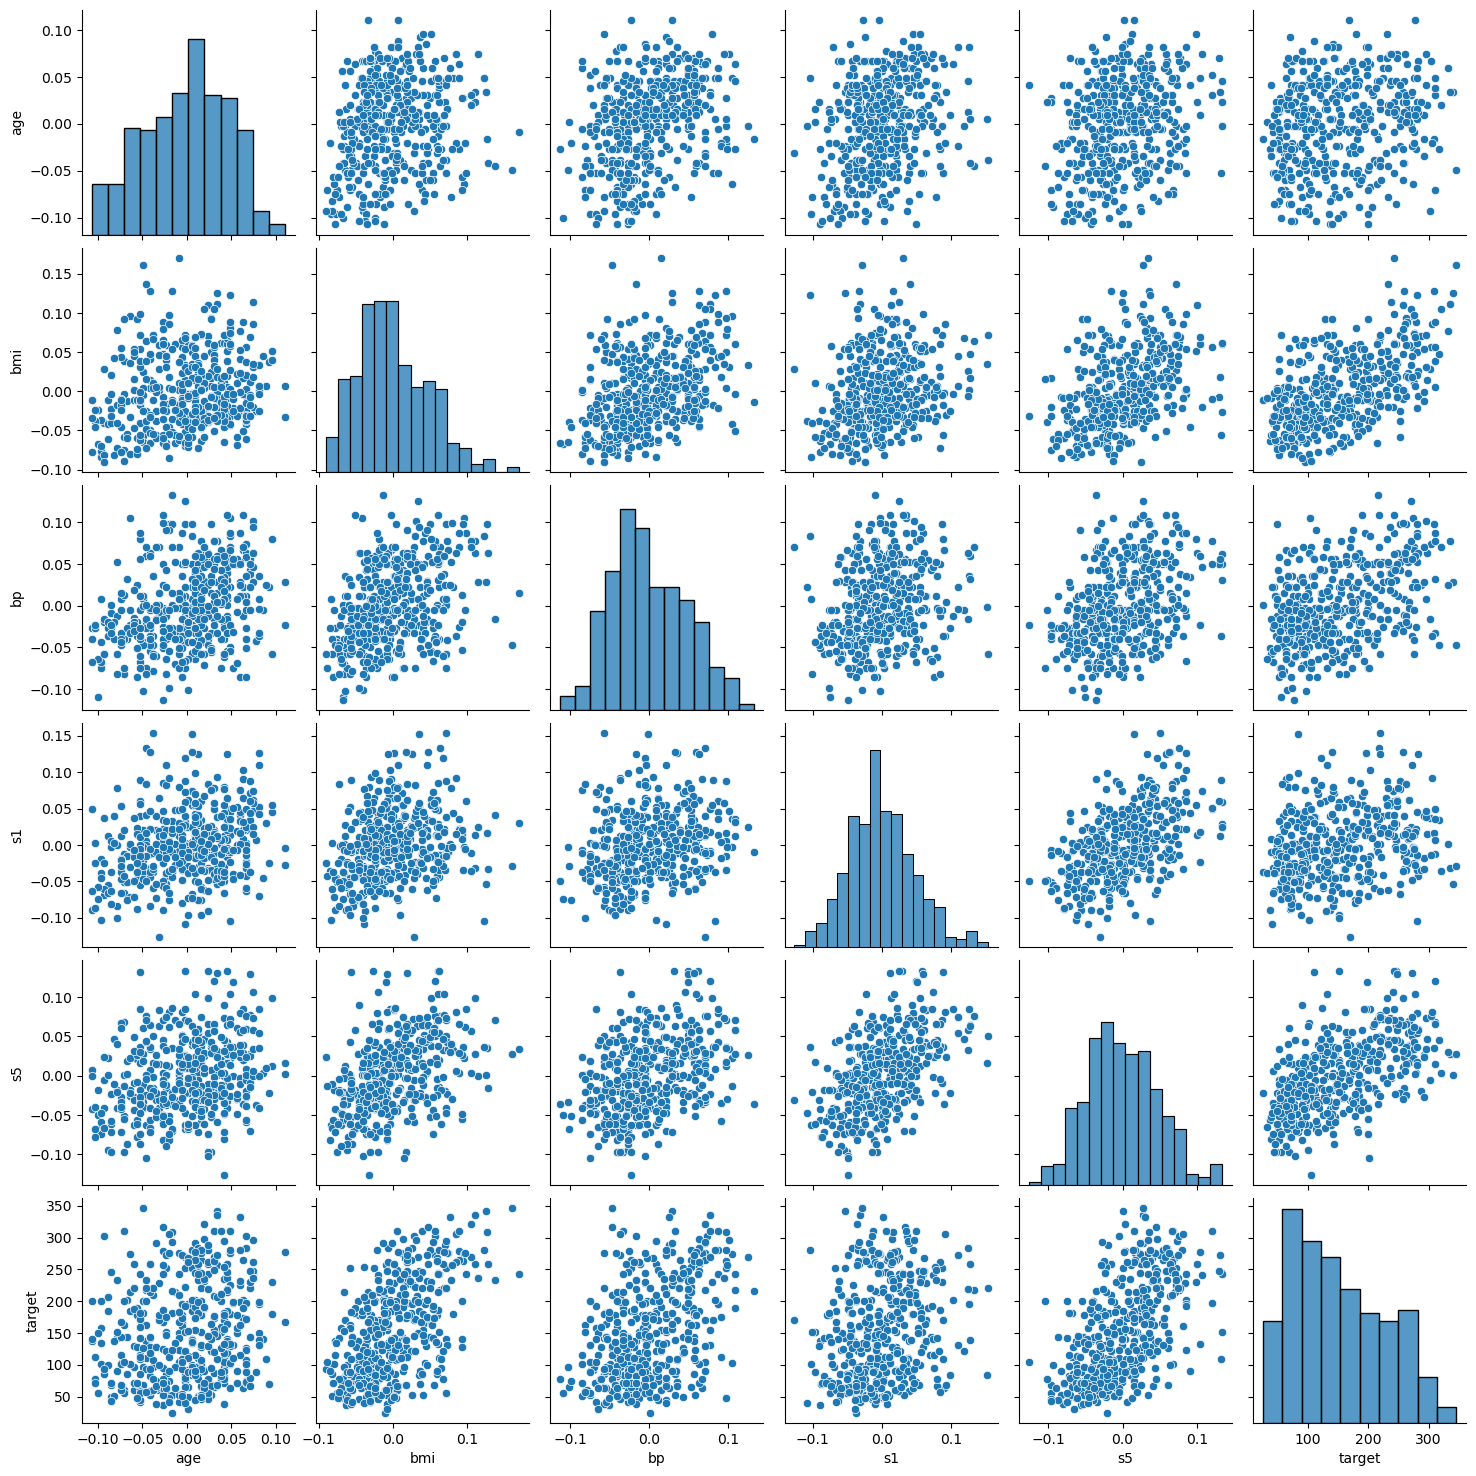

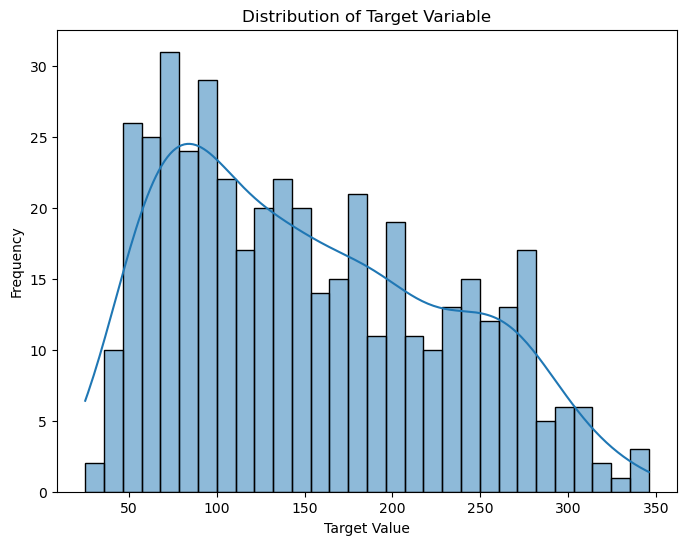

In [7]:
# Pairplot of selected features
selected_features = ['age', 'bmi', 'bp', 's1', 's5', 'target']
sns.pairplot(data[selected_features])
plt.show()

# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['target'], bins=30, kde=True)
plt.title("Distribution of Target Variable")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()


Linear Regression: Mean RMSE = 55.97 (Std Dev = 3.18)
Ridge Regression: Mean RMSE = 60.18 (Std Dev = 4.14)
Lasso Regression: Mean RMSE = 63.02 (Std Dev = 5.09)
Elastic Net Regression: Mean RMSE = 77.65 (Std Dev = 7.16)
Support Vector Regression: Mean RMSE = 72.53 (Std Dev = 7.79)
Random Forest Regression: Mean RMSE = 58.47 (Std Dev = 5.01)
Gradient Boosting Regression: Mean RMSE = 60.25 (Std Dev = 5.69)


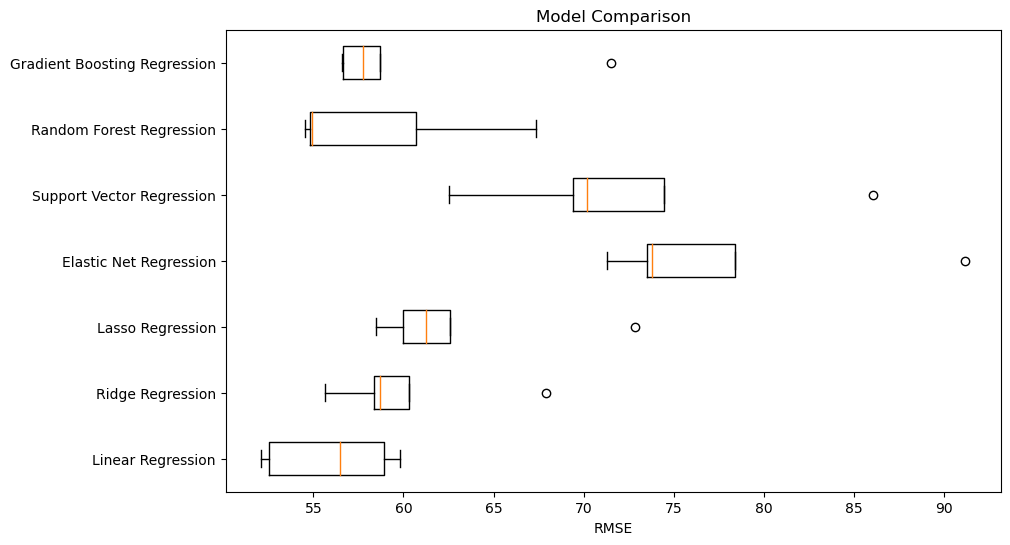

In [8]:

X = diabetes.data
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regression models to compare
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Elastic Net Regression", ElasticNet()),
    ("Support Vector Regression", SVR()),
    ("Random Forest Regression", RandomForestRegressor()),
    ("Gradient Boosting Regression", GradientBoostingRegressor())
]

# Evaluate each model using cross-validation
results = []
names = []

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    results.append(rmse_scores)
    names.append(name)
    print(f"{name}: Mean RMSE = {rmse_scores.mean():.2f} (Std Dev = {rmse_scores.std():.2f})")

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot(results, vert=False)
ax.set_yticklabels(names)
plt.xlabel('RMSE')
plt.title('Model Comparison')
plt.show()
